In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df= pd.read_csv('../dataset/Heart Attack.csv')

In [5]:
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [3]:
X = df.drop('class', axis=1)
y = df['class'].map({'negative': 0, 'positive': 1})

In [7]:
y


0       0
1       1
2       0
3       1
4       0
       ..
1314    0
1315    1
1316    1
1317    1
1318    1
Name: class, Length: 1319, dtype: int64

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


array([[ 5.72357956e-01,  7.18395402e-01, -2.39032215e-01, ...,
         1.78459449e-01, -2.90961900e-01, -3.02342376e-01],
       [-2.57963993e+00,  7.18395402e-01,  3.03491001e-01, ...,
         1.99434379e+00, -1.84072428e-01,  6.05700979e-01],
       [-8.73625310e-02,  7.18395402e-01, -2.77783874e-01, ...,
         1.64718943e+00, -2.86859072e-01, -3.10140458e-01],
       ...,
       [-8.20385295e-01,  7.18395402e-01,  1.29108539e-01, ...,
        -6.76074358e-01, -3.03054447e-01,  3.36968791e+00],
       [-1.60664807e-01,  7.18395402e-01, -3.94038849e-01, ...,
         3.95710113e+00, -2.04586569e-01, -1.68298262e-03],
       [-3.80571637e-01,  7.18395402e-01,  3.03491001e-01, ...,
        -1.68694910e-01,  7.69079350e-01,  1.22088302e+00]])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)


In [11]:
svm_model_linear = SVC(kernel='linear')
svm_model_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [12]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
pca_2d = PCA(n_components=2)
X_train_2d = pca_2d.fit_transform(X_train)

In [14]:
pca_3d = PCA(n_components=3)
X_train_3d = pca_3d.fit_transform(X_train)

In [15]:
fig = plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'PCA Component 2')

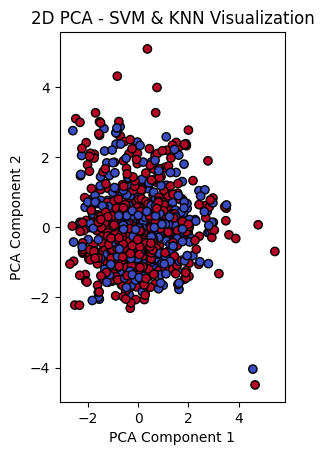

In [16]:
plt.subplot(1, 2, 1)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.title('2D PCA - SVM & KNN Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

In [22]:
# ax = fig.add_subplot(122, projection='3d')
# ax.scatter(X_train_3d[:, 0], X_train_3d[:, 1], X_train_3d[:, 2], c=y_train, cmap='coolwarm', edgecolors='k')
# ax.set_title('3D PCA - SVM & KNN Visualization')
# ax.set_xlabel('PCA Component 1')
# ax.set_ylabel('PCA Component 2')
# ax.set_zlabel('PCA Component 3')

Text(0.5, 0, 'PCA Component 3')

In [23]:
# plt.tight_layout()
# plt.show()

<Figure size 640x480 with 0 Axes>

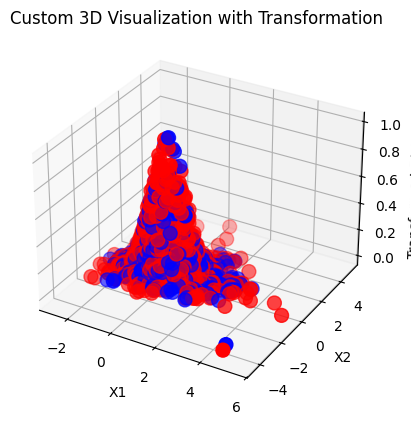

In [24]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))  # Applying transformation
    ax = plt.subplot(projection='3d')  # Creating 3D subplot
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')  # Scatter plot with color map
    ax.set_xlabel('X1')  # Label for x-axis
    ax.set_ylabel('X2')  # Label for y-axis
    ax.set_zlabel('Transformed Distance')  # Label for z-axis
    return ax

# Use the PCA-transformed 3D data to plot using the provided function
plot_3d_plot(X_train_3d, y_train)
plt.title('Custom 3D Visualization with Transformation')
plt.show()